# Capstone Project: Create a Customer Segmentation Report for Arvato Financial Services



## Business Understanding
### Project Overview
Arvato provides financial services to its customers. In this project, I will be analyzing demographics of Germany and Arvato customer base to find out profile of customers and try to identify potential customers.

### Problem Statement
To find demographics representitive of potential customers to Arvato.

### Metrics
The metric we will be using is how likely a mailout will result in customer turnover. Thus, we will be using AUC metric rather than r2 score to find out potential customers regardless of the accuracy of our model.

## Data Understanding

### Data Exploration

Reading the attributes values file, we find that -1 , 9 and 0 indicate unknown for some columns. We will spend a lot of time cleaning the data trying to keep as much information as possible. I attempted to do that without using OOP but now I will utilize OOP for that purpose.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

# magic word for producing visualizations in notebook
%matplotlib inline

In [2]:
# load in the data
azdias = pd.read_pickle('azdias.p')
customers = pd.read_pickle('customers.p')

In [5]:
azdias.tail()

,LNR,AGER_TYP,AKT_DAT_KL,ALTER_HH,ALTER_KIND1,ALTER_KIND2,ALTER_KIND3,ALTER_KIND4,ALTERSKATEGORIE_FEIN,ANZ_HAUSHALTE_AKTIV,...,VHN,VK_DHT4A,VK_DISTANZ,VK_ZG11,W_KEIT_KIND_HH,WOHNDAUER_2008,WOHNLAGE,ZABEOTYP,ANREDE_KZ,ALTERSKATEGORIE_GROB
891216,825761,-1,5.0,17.0,NaN,NaN,NaN,NaN,17.0,15.0,...,2.0,4.0,7.0,8.0,3.0,4.0,3.0,4,2,3
891217,825771,-1,9.0,16.0,NaN,NaN,NaN,NaN,16.0,11.0,...,4.0,6.0,9.0,6.0,6.0,9.0,5.0,6,1,2
891218,825772,-1,1.0,17.0,NaN,NaN,NaN,NaN,17.0,3.0,...,2.0,7.0,10.0,8.0,NaN,5.0,7.0,4,2,2
891219,825776,-1,9.0,0.0,17.0,NaN,NaN,NaN,20.0,7.0,...,4.0,9.0,8.0,5.0,1.0,9.0,5.0,5,1,1
891220,825787,-1,1.0,0.0,NaN,NaN,NaN,NaN,NaN,10.0,...,3.0,8.0,10.0,7.0,6.0,3.0,4.0,3,1,4


We see that we have a file with many attributes of customers which is similar to the general population attributes but has additional three columns online purchase, type of customer, and product group. We see there are missing values in some of the columns so we need to process that prior to modelling our data. We will go through preprocessing step, then do an ETL and refactoring, then proceed to modelling the data.

In [3]:
azdias.describe()

,LNR,AGER_TYP,AKT_DAT_KL,ALTER_HH,ALTER_KIND1,ALTER_KIND2,ALTER_KIND3,ALTER_KIND4,ALTERSKATEGORIE_FEIN,ANZ_HAUSHALTE_AKTIV,...,VHN,VK_DHT4A,VK_DISTANZ,VK_ZG11,W_KEIT_KIND_HH,WOHNDAUER_2008,WOHNLAGE,ZABEOTYP,ANREDE_KZ,ALTERSKATEGORIE_GROB
count,8.912210e+05,891221.000000,817722.000000,817722.000000,81058.000000,29499.000000,6170.000000,1205.000000,628274.000000,798073.000000,...,770025.000000,815304.000000,815304.000000,815304.000000,783619.000000,817722.000000,798073.000000,891221.000000,891221.000000,891221.000000
mean,6.372630e+05,-0.358435,4.421928,10.864126,11.745392,13.402658,14.476013,15.089627,13.700717,8.287263,...,2.417322,6.001214,7.532130,5.945972,3.933406,7.908791,4.052836,3.362438,1.522098,2.777398
std,2.572735e+05,1.198724,3.638805,7.639683,4.097660,3.243300,2.712427,2.452932,5.079849,15.628087,...,1.166572,2.856091,3.247789,2.771464,1.964701,1.923137,1.949539,1.352704,0.499512,1.068775
min,1.916530e+05,-1.000000,1.000000,0.000000,2.000000,2.000000,4.000000,7.000000,0.000000,0.000000,...,0.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,1.000000,1.000000,1.000000
25%,4.144580e+05,-1.000000,1.000000,0.000000,8.000000,11.000000,13.000000,14.000000,11.000000,1.000000,...,2.000000,3.000000,5.000000,4.000000,2.000000,8.000000,3.000000,3.000000,1.000000,2.000000
50%,6.372630e+05,-1.000000,3.000000,13.000000,12.000000,14.000000,15.000000,15.000000,14.000000,4.000000,...,2.000000,6.000000,8.000000,6.000000,4.000000,9.000000,3.000000,3.000000,2.000000,3.000000
75%,8.600680e+05,-1.000000,9.000000,17.000000,15.000000,16.000000,17.000000,17.000000,17.000000,9.000000,...,3.000000,9.000000,10.000000,8.000000,6.000000,9.000000,5.000000,4.000000,2.000000,4.000000
max,1.082873e+06,3.000000,9.000000,21.000000,18.000000,18.000000,18.000000,18.000000,25.000000,595.000000,...,4.000000,11.000000,13.000000,11.000000,6.000000,9.000000,8.000000,6.000000,2.000000,9.000000


Above are some metrics for our data. We see that there are some columns that are missing a lot of values such as ALTER_KIND columns.

### Data Visualization

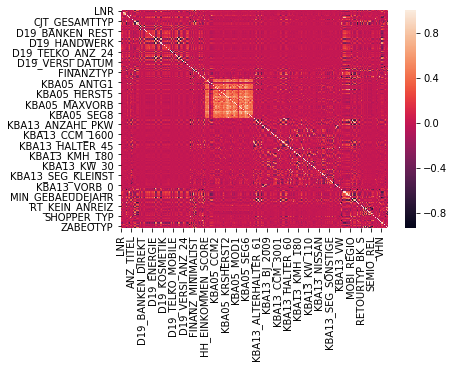

In [7]:
corr_ = azdias.corr()
sns.heatmap(corr_)

We see from graph above that most columns has 0 correlation except for a cluster of columns that has strong correlation with each other. We want to remove columns that correlate strongly with each other to reduce our data. Also, I will try to remove outliers from my data.

## Data Preprocessing

### Refinment

Below you see my refactored code for preporcessing. Initially, I was using a bunch of code that you can see below this refactored code. Also, my model analysis depended on many outliers and strongly correlated columns. I will remove this noise and try to do my analysis without PCA.

In [3]:
def fill_missing_values(cols,na,df):
    df[cols] = df[cols].fillna(na)
    return df

In [33]:
def data_preprocess(df,outliers=True):
    ''' Input: dataframe
        Output: clean dataframe
        Process:
        1. drop columns that are mostly empty
        2. fill na values for object columns
        3. Correct na values for object columns targeted
        4. Turn these columns to int
        5. Drop meaningless object columns
        6. identify cols that need -1 as na value and fill it
        7. identify cols that need 9 as na value and fill it
        8. fill rest of columns with 0 for na
        9. Create dummy variables for objects
        10. Set LNR as index
        11. Remove strongly correlated columns
        12. Remove outliers'''
    drop_cols = df.columns[df.isnull().mean() > .7]
    df = df.drop(drop_cols,axis=1)
    df[['CAMEO_DEUG_2015','CAMEO_INTL_2015']] = df[['CAMEO_DEUG_2015','CAMEO_INTL_2015']].fillna(-1)
    df['CAMEO_DEUG_2015'] = df['CAMEO_DEUG_2015'].replace('X',-1)
    df['CAMEO_INTL_2015'] = df['CAMEO_INTL_2015'].replace('XX',-1)
    df[['CAMEO_DEUG_2015','CAMEO_INTL_2015']] = df[['CAMEO_DEUG_2015','CAMEO_INTL_2015']].astype(int)
    df = df.drop(['D19_LETZTER_KAUF_BRANCHE','EINGEFUEGT_AM'],axis=1)
    df[['CAMEO_DEU_2015','OST_WEST_KZ']]=df[['CAMEO_DEU_2015','OST_WEST_KZ']].fillna(-1)
    df[['RETOURTYP_BK_S','CJT_GESAMTTYP','ALTER_HH']]=df[['RETOURTYP_BK_S','CJT_GESAMTTYP','ALTER_HH']].fillna(0)
    cols_1 = ['AGER_TYP','BALLRAUM','BIP_FLAG','CAMEO_DEUG_2015','CAMEO_DEUINTL_2015','D19_KK_KUNDENTYP','EWDICHTE','FINANZTYP','FINANZ_ANLEGER','FINANZ_HAUSBAUER','FINANZ_MINIMALIST','FINANZ_SPARER','FINANZ_UNAUFFAELLIGER','FINANZ_VORSORGER','HEALTH_TYP','INNENSTADT','KBA05_ANTG1','KBA05_ANTG2','KBA05_ANTG3','KBA05_ANTG4','KBA13_ALTERHALTER_30','KBA13_ALTERHALTER_45','KBA13_ALTERHALTER_60','KBA13_ALTERHALTER_61','KBA13_AUDI','KBA13_AUTOQUOTE','KBA13_BJ_1999','KBA13_BJ_2000','KBA13_BJ_2004','KBA13_BJ_2006','KBA13_BJ_2008','KBA13_BJ_2009','KBA13_BMW','KBA13_CCM_1000','KBA13_CCM_1200','KBA13_CCM_1400','KBA13_CCM_0_1400','KBA13_CCM_1500','KBA13_CCM_1400_2500','KBA13_CCM_1600','KBA13_CCM_1800','KBA13_CCM_2000','KBA13_CCM_2500','KBA13_CCM_2501','KBA13_CCM_3000','KBA13_CCM_3001','KBA13_FAB_ASIEN','KBA13_FAB_SONSTIGE','KBA13_FIAT','KBA13_FORD','KBA13_HALTER_20','KBA13_HALTER_25','KBA13_HALTER_30','KBA13_HALTER_35','KBA13_HALTER_40','KBA13_HALTER_45','KBA13_HALTER_50','KBA13_HALTER_55','KBA13_HALTER_60','KBA13_HALTER_65','KBA13_HALTER_66','KBA13_HERST_ASIEN','KBA13_HERST_AUDI_VW','KBA13_HERST_BMW_BENZ','KBA13_HERST_EUROPA','KBA13_HERST_FORD_OPEL','KBA13_HERST_SONST','KBA13_KMH_110','KBA13_KMH_140','KBA13_KMH_180','KBA13_KMH_0_140','KBA13_KMH_140_210','KBA13_KMH_211','KBA13_KMH_250','KBA13_KMH_251','KBA13_KRSAQUOT','KBA13_KRSHERST_AUDI_VW','KBA13_KRSHERST_BMW_BENZ','KBA13_KRSHERST_FORD_OPEL','KBA13_KRSSEG_KLEIN','KBA13_KRSSEG_OBER','KBA13_KRSSEG_VAN','KBA13_KRSZUL_NEU','KBA13_KW_30','KBA13_KW_40','KBA13_KW_50','KBA13_KW_60','KBA13_KW_0_60','KBA13_KW_70','KBA13_KW_61_120','KBA13_KW_80','KBA13_KW_90','KBA13_KW_110','KBA13_KW_120','KBA13_KW_121','KBA13_MAZDA','KBA13_MERCEDES','KBA13_MOTOR','KBA13_NISSAN','KBA13_OPEL','KBA13_PEUGEOT','KBA13_RENAULT','KBA13_SEG_GELAENDEWAGEN','KBA13_SEG_GROSSRAUMVANS','KBA13_SEG_KLEINST','KBA13_SEG_KLEINWAGEN','KBA13_SEG_KOMPAKTKLASSE','KBA13_SEG_MINIVANS','KBA13_SEG_MINIWAGEN','KBA13_SEG_MITTELKLASSE','KBA13_SEG_OBEREMITTELKLASSE','KBA13_SEG_OBERKLASSE','KBA13_SEG_SONSTIGE','KBA13_SEG_SPORTWAGEN','KBA13_SEG_UTILITIES','KBA13_SEG_VAN','KBA13_SEG_WOHNMOBILE','KBA13_SITZE_4','KBA13_SITZE_5','KBA13_SITZE_6','KBA13_TOYOTA','KBA13_VORB_0','KBA13_VORB_1','KBA13_VORB_1_2','KBA13_VORB_2','KBA13_VORB_3','KBA13_VW','ORTSGR_KLS9','OST_WEST_KZ','PLZ8_ANTG1','PLZ8_ANTG2','PLZ8_ANTG3','PLZ8_ANTG4','PLZ8_GBZ','PLZ8_HHZ','SHOPPER_TYP','SOHO_FLAG','VERS_TYP','WOHNLAGE']
    cols_1.remove('BIP_FLAG')
    cols_1.remove('CAMEO_DEUINTL_2015')
    cols_1.remove('D19_KK_KUNDENTYP')
    cols_1.remove('KBA13_CCM_1400_2500')
    cols_1.remove('SOHO_FLAG')
    cols_9 = ['KBA05_ALTER1','KBA05_ALTER2','KBA05_ALTER3','KBA05_ALTER4','KBA05_ANHANG','KBA05_CCM1','KBA05_CCM2','KBA05_CCM3','KBA05_CCM4','KBA05_DIESEL','KBA05_FRAU','KBA05_HERST1','KBA05_HERST2','KBA05_HERST3','KBA05_HERST4','KBA05_HERST5','KBA05_HERSTTEMP','KBA05_KRSAQUOT','KBA05_KRSHERST1','KBA05_KRSHERST2','KBA05_KRSHERST3','KBA05_KRSKLEIN','KBA05_KRSOBER','KBA05_KRSVAN','KBA05_KRSZUL','KBA05_KW1','KBA05_KW2','KBA05_KW3','KBA05_MAXAH','KBA05_MAXBJ','KBA05_MAXHERST','KBA05_MAXSEG','KBA05_MAXVORB','KBA05_MOD1','KBA05_MOD2','KBA05_MOD3','KBA05_MOD4','KBA05_MOD8','KBA05_MODTEMP','KBA05_MOTOR','KBA05_MOTRAD','KBA05_SEG1','KBA05_SEG10','KBA05_SEG2','KBA05_SEG3','KBA05_SEG4','KBA05_SEG5','KBA05_SEG6','KBA05_SEG7','KBA05_SEG8','KBA05_SEG9','KBA05_VORB0','KBA05_VORB1','KBA05_VORB2','KBA05_ZUL1','KBA05_ZUL2','KBA05_ZUL3','KBA05_ZUL4','SEMIO_DOM','SEMIO_ERL','SEMIO_FAM','SEMIO_KAEM','SEMIO_KRIT','SEMIO_KULT','SEMIO_LUST','SEMIO_MAT','SEMIO_PFLICHT','SEMIO_RAT','SEMIO_REL','SEMIO_SOZ','SEMIO_TRADV','SEMIO_VERT','ZABEOTYP']
    df = fill_missing_values(cols_1,-1,df)
    df = fill_missing_values(cols_9,9,df)
    df=df.fillna(0)
    df = pd.get_dummies(df)
    df = df.set_index('LNR')
    df = df.astype(int)
    df = remove_corr(df,.7)
    if(outliers):
        df = remove_outliers(df)
    return df

Below method was built using this stackoverflow post:

https://stackoverflow.com/questions/29294983/how-to-calculate-correlation-between-all-columns-and-remove-highly-correlated-on/43104383#43104383

In [5]:
def remove_corr(df,corr_):
    corr_matrix = df.corr().abs()
    upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))
    to_drop = [column for column in upper.columns if any(upper[column] > corr_)]
    df = df.drop(to_drop, axis=1)
    return df

In [6]:
def remove_outliers(df):
    df = df[(np.abs(stats.zscore(df)) < 3).all(axis=1)]
    return df

### Initial Preprocessing

Below code is my attempt of preprocessing.

In [42]:
drop_cols = azdias.columns[azdias.isnull().mean() > .7]

These five columns have a lot of missing data and their description cannot be found in the excel sheets. So I will remove these columns.

In [5]:
drop_cols

Index(['ALTER_KIND1', 'ALTER_KIND2', 'ALTER_KIND3', 'ALTER_KIND4',
       'EXTSEL992'],
      dtype='object')

In [43]:
azdias = azdias.drop(drop_cols,axis=1)

In [44]:
customers = customers.drop(drop_cols,axis=1)

Now, we removed columns that has mostly missing values and do not add value. Let's explore columns with object data type.

In [8]:
azdias.select_dtypes(include=['object'])

,CAMEO_DEU_2015,CAMEO_DEUG_2015,CAMEO_INTL_2015,D19_LETZTER_KAUF_BRANCHE,EINGEFUEGT_AM,OST_WEST_KZ
0,NaN,NaN,NaN,NaN,NaN,NaN
1,8A,8,51,NaN,1992-02-10 00:00:00,W
2,4C,4,24,D19_UNBEKANNT,1992-02-12 00:00:00,W
3,2A,2,12,D19_UNBEKANNT,1997-04-21 00:00:00,W
4,6B,6,43,D19_SCHUHE,1992-02-12 00:00:00,W
5,8C,8,54,D19_ENERGIE,1992-02-12 00:00:00,W
6,4A,4,22,D19_UNBEKANNT,1992-02-12 00:00:00,W
7,2D,2,14,D19_UNBEKANNT,1992-02-10 00:00:00,W
8,1A,1,13,NaN,1992-02-10 00:00:00,W
9,1E,1,15,D19_KOSMETIK,1992-02-10 00:00:00,W


These are columns classified as object. Some of them are supposed to be numerical values. Let's start with correcting them. Before we can do that, we need to fill missing values there. We will fill missing values with -1 indicating unknown as in the description.

In [45]:
azdias[['CAMEO_DEUG_2015','CAMEO_INTL_2015']] = azdias[['CAMEO_DEUG_2015','CAMEO_INTL_2015']].fillna(-1)
customers[['CAMEO_DEUG_2015','CAMEO_INTL_2015']] = customers[['CAMEO_DEUG_2015','CAMEO_INTL_2015']].fillna(-1)

We find that missing values were indicated as so with an X. We will replace that value and correct this mistake.

In [46]:
azdias['CAMEO_DEUG_2015'] = azdias['CAMEO_DEUG_2015'].replace('X',-1)
customers['CAMEO_DEUG_2015'] = customers['CAMEO_DEUG_2015'].replace('X',-1)

In [47]:
azdias['CAMEO_INTL_2015'] = azdias['CAMEO_INTL_2015'].replace('XX',-1)
customers['CAMEO_INTL_2015'] = customers['CAMEO_INTL_2015'].replace('XX',-1)

In [48]:
azdias[['CAMEO_DEUG_2015','CAMEO_INTL_2015']] = azdias[['CAMEO_DEUG_2015','CAMEO_INTL_2015']].astype(int)
customers[['CAMEO_DEUG_2015','CAMEO_INTL_2015']] = customers[['CAMEO_DEUG_2015','CAMEO_INTL_2015']].astype(int)

Now, we check one more time for object columns.

In [13]:
azdias.select_dtypes(include=['object']).head()

,CAMEO_DEU_2015,D19_LETZTER_KAUF_BRANCHE,EINGEFUEGT_AM,OST_WEST_KZ
0,NaN,NaN,NaN,NaN
1,8A,NaN,1992-02-10 00:00:00,W
2,4C,D19_UNBEKANNT,1992-02-12 00:00:00,W
3,2A,D19_UNBEKANNT,1997-04-21 00:00:00,W
4,6B,D19_SCHUHE,1992-02-12 00:00:00,W


Date of insertion is not a relevant column. So, we can drop it. KAUF Branch is unknown column so I will drop it too.

In [49]:
azdias = azdias.drop(['D19_LETZTER_KAUF_BRANCHE','EINGEFUEGT_AM'],axis=1)
customers = customers.drop(['D19_LETZTER_KAUF_BRANCHE','EINGEFUEGT_AM'],axis=1)

We will fill missing values in DEU lifestyle and OST_WEST_KZ with -1 for unknown.

In [50]:
azdias[['CAMEO_DEU_2015','OST_WEST_KZ']]=azdias[['CAMEO_DEU_2015','OST_WEST_KZ']].fillna(-1)
customers[['CAMEO_DEU_2015','OST_WEST_KZ']]=customers[['CAMEO_DEU_2015','OST_WEST_KZ']].fillna(-1)

We can fill all missing values with -1 in one shot, however, we have a problem of having some columns with 0 indicating unknown value. Let's see how many columns have missing values in them.

In [16]:
cols_miss = azdias.columns[azdias.isnull().any()]
cols_miss

Index(['AKT_DAT_KL', 'ALTER_HH', 'ALTERSKATEGORIE_FEIN', 'ANZ_HAUSHALTE_AKTIV',
       'ANZ_HH_TITEL', 'ANZ_KINDER', 'ANZ_PERSONEN',
       'ANZ_STATISTISCHE_HAUSHALTE', 'ANZ_TITEL', 'ARBEIT',
       ...
       'UNGLEICHENN_FLAG', 'VERDICHTUNGSRAUM', 'VHA', 'VHN', 'VK_DHT4A',
       'VK_DISTANZ', 'VK_ZG11', 'W_KEIT_KIND_HH', 'WOHNDAUER_2008',
       'WOHNLAGE'],
      dtype='object', length=262)

With an analysis done through Excel, we find that there are 19 columns that has 0 indicating unknown or together with -1 indicates unknown. I will submit the Excel sheet with that work as part of submission. Let's start identify columns that has 0 indicating unknown. They are:

ALTER_HH

CJT_GESAMTTYP

RETOURTYP_BK_S

In [51]:
azdias[['RETOURTYP_BK_S','CJT_GESAMTTYP','ALTER_HH']]=azdias[['RETOURTYP_BK_S','CJT_GESAMTTYP','ALTER_HH']].fillna(0)
customers[['RETOURTYP_BK_S','CJT_GESAMTTYP','ALTER_HH']]=customers[['RETOURTYP_BK_S','CJT_GESAMTTYP','ALTER_HH']].fillna(0)

How many columns are already populated with -1?

In [17]:
azdias.columns[(azdias==-1).any()]

Index(['AGER_TYP', 'CAMEO_DEU_2015', 'CAMEO_DEUG_2015', 'CAMEO_INTL_2015',
       'HEALTH_TYP', 'OST_WEST_KZ', 'SHOPPER_TYP', 'VERS_TYP'],
      dtype='object')

Let's analyze these columns one by one.

In [47]:
customers['AGER_TYP'].isnull().sum()

0

In [48]:
customers['HEALTH_TYP'].isnull().sum()

0

In [51]:
azdias['SHOPPER_TYP'].isnull().sum()

0

In [52]:
azdias['VERS_TYP'].isnull().sum()

0

All of these columns do not have missing values in them. Some of them we processed them already.

Below columns are not part of what had -1 in them. So, we fill them with -1 for na values. I refactored the code as shown below and build column names using Excel.

In [54]:
cols_1 = ['AGER_TYP','BALLRAUM','BIP_FLAG','CAMEO_DEUG_2015','CAMEO_DEUINTL_2015','D19_KK_KUNDENTYP','EWDICHTE','FINANZTYP','FINANZ_ANLEGER','FINANZ_HAUSBAUER','FINANZ_MINIMALIST','FINANZ_SPARER','FINANZ_UNAUFFAELLIGER','FINANZ_VORSORGER','HEALTH_TYP','INNENSTADT','KBA05_ANTG1','KBA05_ANTG2','KBA05_ANTG3','KBA05_ANTG4','KBA13_ALTERHALTER_30','KBA13_ALTERHALTER_45','KBA13_ALTERHALTER_60','KBA13_ALTERHALTER_61','KBA13_AUDI','KBA13_AUTOQUOTE','KBA13_BJ_1999','KBA13_BJ_2000','KBA13_BJ_2004','KBA13_BJ_2006','KBA13_BJ_2008','KBA13_BJ_2009','KBA13_BMW','KBA13_CCM_1000','KBA13_CCM_1200','KBA13_CCM_1400','KBA13_CCM_0_1400','KBA13_CCM_1500','KBA13_CCM_1400_2500','KBA13_CCM_1600','KBA13_CCM_1800','KBA13_CCM_2000','KBA13_CCM_2500','KBA13_CCM_2501','KBA13_CCM_3000','KBA13_CCM_3001','KBA13_FAB_ASIEN','KBA13_FAB_SONSTIGE','KBA13_FIAT','KBA13_FORD','KBA13_HALTER_20','KBA13_HALTER_25','KBA13_HALTER_30','KBA13_HALTER_35','KBA13_HALTER_40','KBA13_HALTER_45','KBA13_HALTER_50','KBA13_HALTER_55','KBA13_HALTER_60','KBA13_HALTER_65','KBA13_HALTER_66','KBA13_HERST_ASIEN','KBA13_HERST_AUDI_VW','KBA13_HERST_BMW_BENZ','KBA13_HERST_EUROPA','KBA13_HERST_FORD_OPEL','KBA13_HERST_SONST','KBA13_KMH_110','KBA13_KMH_140','KBA13_KMH_180','KBA13_KMH_0_140','KBA13_KMH_140_210','KBA13_KMH_211','KBA13_KMH_250','KBA13_KMH_251','KBA13_KRSAQUOT','KBA13_KRSHERST_AUDI_VW','KBA13_KRSHERST_BMW_BENZ','KBA13_KRSHERST_FORD_OPEL','KBA13_KRSSEG_KLEIN','KBA13_KRSSEG_OBER','KBA13_KRSSEG_VAN','KBA13_KRSZUL_NEU','KBA13_KW_30','KBA13_KW_40','KBA13_KW_50','KBA13_KW_60','KBA13_KW_0_60','KBA13_KW_70','KBA13_KW_61_120','KBA13_KW_80','KBA13_KW_90','KBA13_KW_110','KBA13_KW_120','KBA13_KW_121','KBA13_MAZDA','KBA13_MERCEDES','KBA13_MOTOR','KBA13_NISSAN','KBA13_OPEL','KBA13_PEUGEOT','KBA13_RENAULT','KBA13_SEG_GELAENDEWAGEN','KBA13_SEG_GROSSRAUMVANS','KBA13_SEG_KLEINST','KBA13_SEG_KLEINWAGEN','KBA13_SEG_KOMPAKTKLASSE','KBA13_SEG_MINIVANS','KBA13_SEG_MINIWAGEN','KBA13_SEG_MITTELKLASSE','KBA13_SEG_OBEREMITTELKLASSE','KBA13_SEG_OBERKLASSE','KBA13_SEG_SONSTIGE','KBA13_SEG_SPORTWAGEN','KBA13_SEG_UTILITIES','KBA13_SEG_VAN','KBA13_SEG_WOHNMOBILE','KBA13_SITZE_4','KBA13_SITZE_5','KBA13_SITZE_6','KBA13_TOYOTA','KBA13_VORB_0','KBA13_VORB_1','KBA13_VORB_1_2','KBA13_VORB_2','KBA13_VORB_3','KBA13_VW','ORTSGR_KLS9','OST_WEST_KZ','PLZ8_ANTG1','PLZ8_ANTG2','PLZ8_ANTG3','PLZ8_ANTG4','PLZ8_GBZ','PLZ8_HHZ','SHOPPER_TYP','SOHO_FLAG','VERS_TYP','WOHNLAGE']

Doing this, we encounter columns with wrong names. Let's remove them first from list.

In [55]:
cols_1.remove('BIP_FLAG')
cols_1.remove('CAMEO_DEUINTL_2015')
cols_1.remove('D19_KK_KUNDENTYP')
cols_1.remove('KBA13_CCM_1400_2500')
cols_1.remove('SOHO_FLAG')

In [56]:
azdias,customers = fill_missing_values(cols_1,-1)

Now, we filled some columns that has 0 and -1 indicating unknown and eareased that confusion by using 0 as not many columns have -1 indicating unkknown and we already dealt with them.

In [57]:
cols_0 = ['ALTERSKATEGORIE_GROB','ANREDE_KZ','GEBAEUDETYP','GEOSCORE_KLS7','HAUSHALTSSTRUKTUR','HH_EINKOMMEN_SCORE','KBA05_BAUMAX','KBA05_GBZ','KKK','NATIONALITAET_KZ','PRAEGENDE_JUGENDJAHRE','REGIOTYP','TITEL_KZ','WOHNDAUER_2008','WACHSTUMSGEBIET_NB','W_KEIT_KIND_HH']

We find that there are columns not in index. So we remove them.

In [58]:
cols_0.remove('GEOSCORE_KLS7')
cols_0.remove('HAUSHALTSSTRUKTUR')
cols_0.remove('WACHSTUMSGEBIET_NB')

In [59]:
azdias,customers = fill_missing_values(cols_0,0)

We filled missing values that require -1 and 0 with that value. Now, we find columns that has 9 iindicating unknown.

In [84]:
azdias.columns[(azdias==9).any()]

Index(['AKT_DAT_KL', 'ALTER_HH', 'ALTERSKATEGORIE_FEIN', 'ANZ_HAUSHALTE_AKTIV',
       'ANZ_HH_TITEL', 'ANZ_KINDER', 'ANZ_PERSONEN',
       'ANZ_STATISTISCHE_HAUSHALTE', 'ARBEIT', 'CAMEO_DEUG_2015',
       ...
       'LP_STATUS_FEIN', 'ORTSGR_KLS9', 'PRAEGENDE_JUGENDJAHRE', 'RELAT_AB',
       'VERDICHTUNGSRAUM', 'VK_DHT4A', 'VK_DISTANZ', 'VK_ZG11',
       'WOHNDAUER_2008', 'ALTERSKATEGORIE_GROB'],
      dtype='object', length=105)

In [60]:
cols_9 = ['KBA05_ALTER1','KBA05_ALTER2','KBA05_ALTER3','KBA05_ALTER4','KBA05_ANHANG','KBA05_CCM1','KBA05_CCM2','KBA05_CCM3','KBA05_CCM4','KBA05_DIESEL','KBA05_FRAU','KBA05_HERST1','KBA05_HERST2','KBA05_HERST3','KBA05_HERST4','KBA05_HERST5','KBA05_HERSTTEMP','KBA05_KRSAQUOT','KBA05_KRSHERST1','KBA05_KRSHERST2','KBA05_KRSHERST3','KBA05_KRSKLEIN','KBA05_KRSOBER','KBA05_KRSVAN','KBA05_KRSZUL','KBA05_KW1','KBA05_KW2','KBA05_KW3','KBA05_MAXAH','KBA05_MAXBJ','KBA05_MAXHERST','KBA05_MAXSEG','KBA05_MAXVORB','KBA05_MOD1','KBA05_MOD2','KBA05_MOD3','KBA05_MOD4','KBA05_MOD8','KBA05_MODTEMP','KBA05_MOTOR','KBA05_MOTRAD','KBA05_SEG1','KBA05_SEG10','KBA05_SEG2','KBA05_SEG3','KBA05_SEG4','KBA05_SEG5','KBA05_SEG6','KBA05_SEG7','KBA05_SEG8','KBA05_SEG9','KBA05_VORB0','KBA05_VORB1','KBA05_VORB2','KBA05_ZUL1','KBA05_ZUL2','KBA05_ZUL3','KBA05_ZUL4','SEMIO_DOM','SEMIO_ERL','SEMIO_FAM','SEMIO_KAEM','SEMIO_KRIT','SEMIO_KULT','SEMIO_LUST','SEMIO_MAT','SEMIO_PFLICHT','SEMIO_RAT','SEMIO_REL','SEMIO_SOZ','SEMIO_TRADV','SEMIO_VERT','ZABEOTYP']

In [61]:
azdias,customers = fill_missing_values(cols_9,9)

Let's run missing values one more time to see how many we are missing now.

In [30]:
azdias.columns[azdias.isnull().any()]

Index(['AKT_DAT_KL', 'ALTER_HH', 'ALTERSKATEGORIE_FEIN', 'ANZ_HAUSHALTE_AKTIV',
       'ANZ_HH_TITEL', 'ANZ_KINDER', 'ANZ_PERSONEN',
       'ANZ_STATISTISCHE_HAUSHALTE', 'ANZ_TITEL', 'ARBEIT',
       ...
       'UMFELD_ALT', 'UMFELD_JUNG', 'UNGLEICHENN_FLAG', 'VERDICHTUNGSRAUM',
       'VHA', 'VHN', 'VK_DHT4A', 'VK_DISTANZ', 'VK_ZG11', 'WOHNLAGE'],
      dtype='object', length=195)

We can now run fillna 0 to remove rest of missing values.

In [62]:
azdias=azdias.fillna(0)
customers=customers.fillna(0)

Now, we convert all columns with float to int. But first let's get rid of object columns by creating dummies. But let's check customers as we didn't check it at the begining.

In [33]:
customers.select_dtypes(include=['object']).head()

,CAMEO_DEU_2015,OST_WEST_KZ,PRODUCT_GROUP,CUSTOMER_GROUP
0,1A,W,COSMETIC_AND_FOOD,MULTI_BUYER
1,-1,-1,FOOD,SINGLE_BUYER
2,5D,W,COSMETIC_AND_FOOD,MULTI_BUYER
3,4C,W,COSMETIC,MULTI_BUYER
4,7B,W,FOOD,MULTI_BUYER


In [63]:
azdias = pd.get_dummies(azdias)
customers_ = customers.drop(['CUSTOMER_GROUP', 'ONLINE_PURCHASE','PRODUCT_GROUP'],axis=1)
customers = pd.get_dummies(customers)

In [64]:
customers_ = pd.get_dummies(customers_)

Now, we convert all columns to int.

In [65]:
azdias = azdias.astype(int)
customers = customers.astype(int)

Now, we save our dataframes to pickle.

In [70]:
azdias.to_hdf('clean_azdias.hdf','mydata',mode='w')

In [66]:
customers_.to_pickle('clean_customers_.p')
customers.to_pickle('clean_customers.p')

## Modeling

### Unsupervised Model

Since we have too many columns, it is best to reduce these columns using PCA. First, we clean our data using preprocess then we do PCA analysis.

In [7]:
azdias = data_preprocess(azdias)

In [43]:
azdias.shape

(84207, 178)

In [8]:
customers = data_preprocess(customers)

In [45]:
customers.shape

(42876, 145)

In [52]:
azdias = pd.read_hdf('clean_azdias.hdf','mydata')
customers_ = pd.read_pickle('clean_customers_.p')
customers = pd.read_pickle('clean_customers.p')

In [3]:
customers = pd.read_pickle('clean_customers.p')

In [13]:
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN
from sklearn.cluster import MeanShift
from sklearn.metrics import silhouette_score

In [108]:
def reduce_data(df,n=2):
    pca = PCA(n_components=n).fit(df)
    reduced_data = pca.transform(df)
    reduced_data = pd.DataFrame(reduced_data, columns = ['Dimension 1', 'Dimension 2'])
    print(pca.explained_variance_ratio_.sum())
    return reduced_data

In [109]:
reduced_azdias = reduce_data(azdias)
reduced_customers = reduce_data(customers)

0.9183127330418874
0.954405204209516


In [110]:
reduced_azdias.to_pickle('reduced_azdias.p')
reduced_customers.to_pickle('reduced_customers.p')

As you can see, the variance explained is more than 85%. So, we will proceed with it.

In [5]:
reduced_azdias = pd.read_pickle('reduced_azdias.p')
reduced_customers = pd.read_pickle('reduced_customers.p')

Now, we compute optimal number of clusters using kmeans. We have to sample our dataframe since we have a large dataset.

In [17]:
def sil_score(n,k,df):
    clusterer = KMeans(n_clusters=n,random_state=42).fit(df)
    s = df.sample(k)
    preds = clusterer.predict(s)
    score = silhouette_score(s,preds)
    return score

In [7]:
# Azdias with PCA and without removing outliers.
X = []
Y = []
for i in range(2,10):
    X.append(i)
    y = sil_score(i,10000)
    Y.append(y)

In [18]:
# Collect data points for azdias without PCA and removing outliers
X = []
Y = []
for i in range(2,10):
    X.append(i)
    y = sil_score(i,10000,azdias)
    Y.append(y)

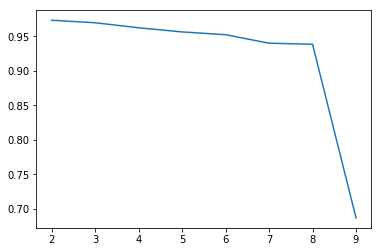

In [19]:
# plot of data with outliers remoed and wihtout using PCA
plt.plot(X,Y)

In this case, we will go with 2 clusters.

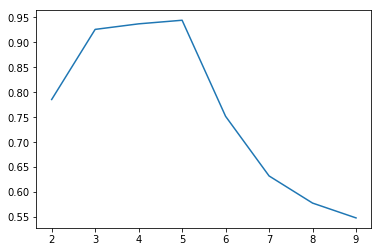

In [8]:
# plot of original data without outliers removed and using PCA
plt.plot(X,Y)

We will go with 5 clusters. Next, we build a method to identify where our customers are in which cluster.

In [20]:
clusterer = KMeans(n_clusters=2,random_state=42).fit(azdias)

In [11]:
clusterer = KMeans(n_clusters=5,random_state=42).fit(reduced_azdias)

In [24]:
def identify_customers(clusterer,reduced_azdias,reduced_customers):
    cluster_map = pd.DataFrame()
    cluster_map['data_index'] = reduced_azdias.index.values
    cluster_map['cluster'] = clusterer.labels_
    v = []
    for j in cluster_map['cluster'].unique():
        v.append(sum(cluster_map[cluster_map.cluster == j].index.isin(reduced_customers.index)))
    return v,cluster_map

In [25]:
h, cluster_map = identify_customers(clusterer,azdias,customers)

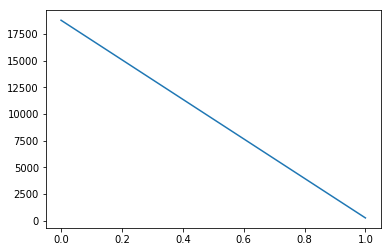

In [26]:
# plot for identify custoemrs without using PCA and removing outliers
plt.plot(range(2),h)

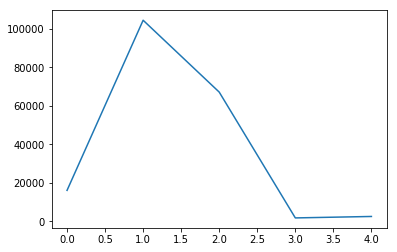

In [17]:
plt.plot(range(5),h)

Cluster 1 seems the one with most similarity to customers. We save these results into df.

In [18]:
df = customers[customers.index.isin(cluster_map[cluster_map.cluster==1].index)]

In [27]:
df1 = customers[customers.index.isin(cluster_map[cluster_map.cluster==0].index)]

### Supervised Model

Now, we load mailout_train and mailout_test dataframes. The idea is to find best model that will have optimal AUC.

In [34]:
mailout_train = pd.read_pickle('mailout_train.p')

In [35]:
mailout_train = data_preprocess(mailout_train,False)

In [36]:
mailout_train['RESPONSE'].value_counts()

0    42430
1      532
Name: RESPONSE, dtype: int64

In [37]:
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [38]:
X = mailout_train.drop('RESPONSE',axis=1)
y = mailout_train['RESPONSE']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
clf = tree.DecisionTreeClassifier().fit(X_train,y_train)
y_preds = clf.predict(X_test)
score = metrics.roc_auc_score(y_test, y_preds)
print(score)

0.504208401158742


Decission tree get a score of 51%.

Let's use SVM with gridsearch. I borrowed this method from below post:

https://medium.com/@aneesha/svm-parameter-tuning-in-scikit-learn-using-gridsearchcv-2413c02125a0

In [47]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

In [52]:
def svc_param_selection(X, y):
    Cs = [0.001, 0.01, 0.1, 1, 10]
    gammas = [0.001, 0.01, 0.1, 1]
    param_grid = {'C': Cs, 'gamma' : gammas}
    grid_search = GridSearchCV(SVC(kernel='rbf'), param_grid,n_jobs=-1)
    grid_search.fit(X, y)
    grid_search.best_params_
    return grid_search.best_params_

In [53]:
X = mailout_train.drop('RESPONSE',axis=1)
y = mailout_train['RESPONSE']
best_params = svc_param_selection(X,y)

In [58]:
X = mailout_train.drop('RESPONSE',axis=1)
y = mailout_train['RESPONSE']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
clf=SVC(kernel='rbf',C=.001,gamma=.001).fit(X,y)
y_preds = clf.predict(X_test)
score = metrics.roc_auc_score(y_test, y_preds)
print(score)

0.5


Even with grid search, SVC got the best score of 50%.

In [39]:
from sklearn.naive_bayes import GaussianNB

In [40]:
clf = GaussianNB().fit(X_train,y_train)
y_preds = clf.predict(X_test)
score = metrics.roc_auc_score(y_test, y_preds)
print(score)

0.5896041656606757


GaussianNB makes a better prediction. Let's use this model on entirely of data.

In [43]:
clf = GaussianNB().fit(X,y)

### Submission into Kaggle

The results has been submitted to Kaggle at below link:
https://www.kaggle.com/c/udacity-arvato-identify-customers/leaderboard

In [55]:
mailout_test = pd.read_pickle('mailout_test.p')

In [56]:
mailout_test = data_preprocess(mailout_test,False)

In [46]:
preds = clf.predict(mailout_test)

In [51]:
data = pd.DataFrame()
data['LNR'] = mailout_test.index
data['RESPONSE'] = preds
data.set_index('LNR')
data.to_csv('competition_result.csv')

## Conclusion

### Reflection
It was an interesting project but I faced issues in the part of data. The data was big to the point it created memory issues. I solved that problem by sampling the data when running unsupervised learning. An interesting point about the project is how strong unsupervised learning on detecting customers. I was doubtful at that but the results show that there is a clearn demographic for our customers.

### Improvment
One thing I could have improved is by using pipelines and grid search utilizing deep learning methods to find more optimal results for supervised learning. Another thing, is to report what variables distinguish our customers from the rest of the demographic.